In [1]:
%run setup.ipynb

In [2]:
region_vgsc = '2L', 2358158, 2431617

In [3]:
phase2_ar1.load_geneset_agamp44(attributes=['ID', 'Parent'])
geneset_agamp44 = geneset_to_pandas(phase2_ar1.geneset_agamp44)
geneset_agamp44.head()

,seqid,source,type,start,end,score,strand,phase,ID,Parent
0,2L,VectorBase,chromosome,1,49364325,-1,.,-1,2L,.
1,2L,VectorBase,three_prime_UTR,157348,157495,-1,-,-1,.,AGAP004677-RA
2,2L,VectorBase,three_prime_UTR,157348,157495,-1,-,-1,.,AGAP004677-RB
3,2L,VectorBase,exon,157348,157623,-1,-,-1,.,AGAP004677-RA
4,2L,VectorBase,exon,157348,157623,-1,-,-1,.,AGAP004677-RB


In [4]:
geneset_agamp44_vgsc = geneset_agamp44.query("(seqid == %r) & (start >= %s) & (end <= %s)" % region_vgsc).copy()
geneset_agamp44_vgsc.head()

,seqid,source,type,start,end,score,strand,phase,ID,Parent
665,2L,VectorBase,CDS,2358158,2358304,-1,+,0,AGAP004707-PA,AGAP004707-RA
666,2L,VectorBase,CDS,2358158,2358304,-1,+,0,AGAP004707-PB,AGAP004707-RB
667,2L,VectorBase,CDS,2358158,2358304,-1,+,0,AGAP004707-PC,AGAP004707-RC
668,2L,VectorBase,exon,2358158,2358304,-1,+,-1,.,AGAP004707-RA
669,2L,VectorBase,exon,2358158,2358304,-1,+,-1,.,AGAP004707-RB


In [5]:
# replace CDS IDs as not informative
fid = geneset_agamp44_vgsc.ID.values
fid[(geneset_agamp44_vgsc.type == 'CDS').values] = ''
geneset_agamp44_vgsc['ID'] = fid

In [6]:
geneset_davies = geneset_to_pandas(allel.FeatureTable.from_gff3('davies_vgsc_model.gff3', attributes=['ID', 'Parent']))
geneset_davies.head(12)

,seqid,source,type,start,end,score,strand,phase,ID,Parent
0,2L,Davies et al. (2007),mRNA,2358158,2431617,-1,+,-1,Davies-C1N2,AGAP004707
1,2L,Davies et al. (2007),mRNA,2358158,2431617,-1,+,-1,Davies-C3N2,AGAP004707
2,2L,Davies et al. (2007),mRNA,2358158,2431617,-1,+,-1,Davies-C5N2,AGAP004707
3,2L,Davies et al. (2007),mRNA,2358158,2431617,-1,+,-1,Davies-C7N2,AGAP004707
4,2L,Davies et al. (2007),mRNA,2358158,2431617,-1,+,-1,Davies-C8N2,AGAP004707
5,2L,Davies et al. (2007),mRNA,2358158,2431617,-1,+,-1,Davies-C10N2,AGAP004707
6,2L,Davies et al. (2007),mRNA,2358158,2431617,-1,+,-1,Davies-C11N2,AGAP004707
7,2L,Davies et al. (2007),mRNA,2358158,2431617,-1,+,-1,Davies-C1N9,AGAP004707
8,2L,Davies et al. (2007),mRNA,2358158,2431617,-1,+,-1,Davies-C8N9,AGAP004707
9,2L,Davies et al. (2007),mRNA,2358158,2431617,-1,+,-1,Davies-C1N9ck,AGAP004707


In [7]:
# geneset_davies = pandas.read_csv('davies_vgsc_model.txt', sep='\t')
# geneset_davies.head(12)

In [8]:
geneset_vgsc_combined = pandas.concat([geneset_agamp44_vgsc, geneset_davies])
geneset_vgsc_combined.head()

,seqid,source,type,start,end,score,strand,phase,ID,Parent
665,2L,VectorBase,CDS,2358158,2358304,-1,+,0,,AGAP004707-RA
666,2L,VectorBase,CDS,2358158,2358304,-1,+,0,,AGAP004707-RB
667,2L,VectorBase,CDS,2358158,2358304,-1,+,0,,AGAP004707-RC
668,2L,VectorBase,exon,2358158,2358304,-1,+,-1,.,AGAP004707-RA
669,2L,VectorBase,exon,2358158,2358304,-1,+,-1,.,AGAP004707-RB


In [9]:
geneset_vgsc_combined.query("type == 'mRNA'")

,seqid,source,type,start,end,score,strand,phase,ID,Parent
672,2L,VectorBase,mRNA,2358158,2431617,-1,+,-1,AGAP004707-RA,AGAP004707
673,2L,VectorBase,mRNA,2358158,2431617,-1,+,-1,AGAP004707-RB,AGAP004707
674,2L,VectorBase,mRNA,2358158,2431617,-1,+,-1,AGAP004707-RC,AGAP004707
0,2L,Davies et al. (2007),mRNA,2358158,2431617,-1,+,-1,Davies-C1N2,AGAP004707
1,2L,Davies et al. (2007),mRNA,2358158,2431617,-1,+,-1,Davies-C3N2,AGAP004707
2,2L,Davies et al. (2007),mRNA,2358158,2431617,-1,+,-1,Davies-C5N2,AGAP004707
3,2L,Davies et al. (2007),mRNA,2358158,2431617,-1,+,-1,Davies-C7N2,AGAP004707
4,2L,Davies et al. (2007),mRNA,2358158,2431617,-1,+,-1,Davies-C8N2,AGAP004707
5,2L,Davies et al. (2007),mRNA,2358158,2431617,-1,+,-1,Davies-C10N2,AGAP004707
6,2L,Davies et al. (2007),mRNA,2358158,2431617,-1,+,-1,Davies-C11N2,AGAP004707


In [10]:
def plot_transcripts(geneset, chrom, start, stop, height=.5, label_transcripts=True, label_exons=False, label_exon_size=False,
                     label_codons=False, highlight_exons=None, label_cdss=False, highlight_color='red', ax=None):
    """Plot all transcripts for all genes overlapping a given region."""

    if ax is None:
        fig, ax = plt.subplots(figsize=(15, 2))
        sns.despine(ax=ax, left=True, offset=5)

    # find genes overlapping the given region 
    genes = geneset.query("(type == 'gene') and (seqid == %r) and (end >= %s) and (start <= %s)" % (chrom, start, stop)).sort_values('start')

    # iterate over genes
    for _, gene in genes.iterrows():

        # find child transcripts
        transcripts = geneset.query("(type == 'mRNA') and (Parent == %r)" % gene.ID).sort_values('ID')

        # iterate over transcripts
        for i, (_, transcript) in enumerate(transcripts.iterrows()):
            
            # coordinates for plotting the transcript
            if transcript.strand == '+':
                y = i
            else:
                y = -i - 1

            # annotate with transcript ID
            text_y = y + height + (height / 10)
            if label_transcripts == 'right':
                text_x = min(stop, transcript.end)
                ha = 'right'
            else:
                text_x = max(start, transcript.start)
                ha = 'left'
            if label_transcripts:
                if transcript.strand == '+':
                    text = '%s >' % transcript.ID
                else:
                    text = '< %s' % transcript.ID
                ax.text(text_x, text_y, text, ha=ha, va='bottom')
            
            # find child exons
            exons = geneset.query("type == 'exon' and Parent == %r" % transcript.ID).sort_values('start')
            
            # iterate over exons to plot introns
            last_exon = None
            for i, (_, exon) in enumerate(exons.iterrows()):
                x = exon.start
                width = exon.end - x

                # plot intron
                if last_exon is not None:
                    ax.plot([last_exon.end, (last_exon.end + exon.start) / 2, exon.start], [y + height / 2, y + height / 1.5, y + height / 2], 'k-')
                last_exon = exon
                
                # exon number
                n = i + 1 if exon.strand == '+' else len(exons) - i
                
                # label exons
                if label_exons and exon.end > start and exon.start < stop:
                    text_x = (exon.start + exon.end) / 2
                    ha = 'center'
                    if text_x < start:
                        text_x = start
                        ha = 'left'
                    elif text_x > stop:
                        text_x = stop
                        ha = 'right'
                    s = str(n)
                    if label_exon_size:
                        s += ' (%s)' % (exon.end - exon.start + 1)
                    if label_exons == 'center':
                        ax.text(text_x, y + height / 2, s, ha=ha, va='center', color='w', zorder=20, fontweight='bold')
                    else:
                        ax.text(text_x, text_y, s, ha=ha, va='bottom', color='k', zorder=20)
                
                # highlight exons
                if highlight_exons and (transcript.ID, n) in highlight_exons:
                    patch = plt.Rectangle((x, y), width, height, color=highlight_color, alpha=1, zorder=10)
                    ax.add_patch(patch)

            # find child CDSs
            cdss = geneset.query("type == 'CDS' and Parent == %r" % transcript.ID)
            if transcript.strand == '+':
                cdss = cdss.sort_values('start', ascending=True)
            else:
                cdss = cdss.sort_values('end', ascending=False)
            # keep track of CDS position
            cds_pos = 0
            for _, cds in cdss.iterrows():
                x = cds.start
                width = cds.end - x
                patch = plt.Rectangle((x, y), width, height, color='k')
                ax.add_patch(patch)
                if label_codons:
                    # report 1-based numbers
                    s = '%s (%s)' % ((cds_pos // 3) + 1, cds_pos + 1)
                    if transcript.strand == '+':
                        text_x = x
                        ha = 'left'
                    else:
                        text_x = x + width
                        ha = 'right'
                    if text_x > start and text_x < stop:
                        ax.text(text_x, text_y, s, ha=ha, va='bottom')
                # label CDSs
                if label_cdss and cds.end > start and cds.start < stop:
                    text_x = (cds.start + cds.end) / 2
                    ha = 'center'
                    if text_x < start:
                        text_x = start
                        ha = 'left'
                    elif text_x > stop:
                        text_x = stop
                        ha = 'right'
                    s = cds.ID
                    if label_cdss == 'center':
                        ax.text(text_x, y + height / 2, s, ha=ha, va='center', color='w', zorder=20, fontweight='bold')
                    else:
                        ax.text(text_x, text_y, s, ha=ha, va='bottom', color='k', zorder=20)
                # accumulate CDS positions
                cds_pos += width + 1  # N.B., GFF coords are 1-based end-inclusive

            # find child UTRs
            utrs = geneset.query("(type == 'three_prime_UTR' or type == 'five_prime_UTR') and Parent == %r" % transcript.ID).sort_values('start')
            for _, utr in utrs.iterrows():
                x = utr.start
                width = utr.end - x
                utr_height = height * .8
                utr_y = y + (height - utr_height) / 2
                patch = plt.Rectangle((x, utr_y), width, utr_height, facecolor='#cccccc', edgecolor='k')
                ax.add_patch(patch)

    ax.set_yticks([])
    ax.set_xlim(start, stop)
    ax.set_xticklabels([humanize.intcomma(int(x)) for x in ax.get_xticks()])
#     ax.axhline(0 - (height / 2), color='k', linestyle='--')
    ax.set_xlabel('Chromosome %s position (bp)' % chrom)
    ax.autoscale(axis='y', tight=True)
    

In [11]:
def transcript_length_stats(geneset, gene_id):
    
    # N.B., GFF coordinates are 1-based end-inclusive
    
    # find child transcripts
    transcripts = geneset.query("(type == 'mRNA') and (Parent == %r)" % gene_id).sort_values('ID')

    # iterate over transcripts
    for i, (_, transcript) in enumerate(transcripts.iterrows()):
        print(transcript.ID)
        
        # compute total span
        print('total span: %s bp' % intcomma(transcript.end - transcript.start + 1))

        # compute total exon length
        exons = geneset.query("type == 'exon' and Parent == %r" % transcript.ID)
        print('number of exons: %s' % len(exons))
        total_exon_length = sum([(f.end - f.start + 1) for _, f in exons.iterrows()])
        print('total exon length: %s bp' % total_exon_length)
        
        # compute total CDS length
        cdss = geneset.query("type == 'CDS' and Parent == %r" % transcript.ID)
        total_cds_length = sum([(f.end - f.start + 1) for _, f in cdss.iterrows()])
        print('total CDS length: %s bp (%s codons)' % (total_cds_length, total_cds_length / 3))
        
        # compute total UTR length
        utrs = geneset.query("(type == 'three_prime_UTR' or type == 'five_prime_UTR') and Parent == %r" % transcript.ID)
        total_utr_length = sum([(f.end - f.start + 1) for _, f in utrs.iterrows()])
        print('total UTR length: %s bp' % total_utr_length)
        
        assert total_exon_length == total_cds_length + total_utr_length, "WEIRDNESS ALERT"


In [12]:
transcript_length_stats(geneset_vgsc_combined, 'AGAP004707')

AGAP004707-RA
total span: 73,460 bp
number of exons: 31
total exon length: 6357 bp
total CDS length: 6357 bp (2119.0 codons)
total UTR length: 0 bp
AGAP004707-RB
total span: 73,460 bp
number of exons: 31
total exon length: 6279 bp
total CDS length: 6279 bp (2093.0 codons)
total UTR length: 0 bp
AGAP004707-RC
total span: 73,460 bp
number of exons: 31
total exon length: 6279 bp
total CDS length: 6279 bp (2093.0 codons)
total UTR length: 0 bp
Davies-C10N2
total span: 73,460 bp
number of exons: 30
total exon length: 6225 bp
total CDS length: 6225 bp (2075.0 codons)
total UTR length: 0 bp
Davies-C11N2
total span: 73,460 bp
number of exons: 30
total exon length: 6225 bp
total CDS length: 6225 bp (2075.0 codons)
total UTR length: 0 bp
Davies-C1N2
total span: 73,460 bp
number of exons: 32
total exon length: 6309 bp
total CDS length: 6309 bp (2103.0 codons)
total UTR length: 0 bp
Davies-C1N9
total span: 73,460 bp
number of exons: 32
total exon length: 6387 bp
total CDS length: 6387 bp (2129.0 c

In [13]:
highlight_exons = [
    # optional exon j
    ('Davies-C8N9', 2),
    ('Davies-C8N2', 2),
    # length difference in exon 3
    ('Davies-C8N9', 3),
    ('Davies-C8N2', 3),
    ('Davies-C7N2', 2),
    ('Davies-C5N2', 2),
    ('Davies-C3N2', 2),
    ('Davies-C1N9ck', 2),
    ('Davies-C1N9', 2),
    ('Davies-C1N2', 2),
    ('Davies-C11N2', 2),
    ('Davies-C10N2', 2),
    ('AGAP004707-RC', 2),
    ('AGAP004707-RB', 2),
    ('AGAP004707-RA', 2),
    # exon 5 is missing in C3N2
    ('Davies-C8N9', 5),
    ('Davies-C8N2', 5),
    ('Davies-C7N2', 4),
    ('Davies-C5N2', 4),
    ('Davies-C1N9ck', 4),
    ('Davies-C1N9', 4),
    ('Davies-C1N2', 4),
    ('Davies-C11N2', 4),
    ('Davies-C10N2', 4),
    ('AGAP004707-RC', 4),
    ('AGAP004707-RB', 4),
    ('AGAP004707-RA', 4),
    # exon 10 is missing in C5N2
    ('Davies-C8N9', 10),
    ('Davies-C8N2', 10),
    ('Davies-C7N2', 9),
    ('Davies-C3N2', 8),
    ('Davies-C1N9ck', 9),
    ('Davies-C1N9', 9),
    ('Davies-C1N2', 9),
    ('Davies-C11N2', 9),
    ('Davies-C10N2', 9),
    ('AGAP004707-RC', 9),
    ('AGAP004707-RB', 9),
    ('AGAP004707-RA', 9),
    # optional exon 12
    ('Davies-C1N9ck', 11),
    ('Davies-C1N9', 11),
    ('Davies-C1N2', 11),
    # optional exon 13 (a)
    ('Davies-C1N9ck', 12),
    ('Davies-C1N9', 12),
    ('Davies-C1N2', 12),
    ('AGAP004707-RC', 11),
    ('AGAP004707-RB', 11),
    ('AGAP004707-RA', 11),
    # alternative exon 20 pair (c/d)
    ('Davies-C8N9', 18),
    ('Davies-C8N2', 18),
    ('Davies-C7N2', 17),
    ('Davies-C5N2', 16),
    ('Davies-C3N2', 16),
    ('Davies-C1N9ck', 19),
    ('Davies-C1N9', 19),
    ('Davies-C1N2', 19),
    ('Davies-C11N2', 17),
    ('Davies-C10N2', 17),
    ('AGAP004707-RC', 18),
    ('AGAP004707-RB', 18),
    ('AGAP004707-RA', 18),
    # length difference in exon 23 (f+/-)
    ('Davies-C8N9', 21),
    ('Davies-C8N2', 21),
    ('Davies-C7N2', 20),
    ('Davies-C5N2', 19),
    ('Davies-C3N2', 19),
    ('Davies-C1N9ck', 22),
    ('Davies-C1N9', 22),
    ('Davies-C1N2', 22),
    ('Davies-C11N2', 20),
    ('Davies-C10N2', 20),
    ('AGAP004707-RC', 21),
    ('AGAP004707-RB', 21),
    ('AGAP004707-RA', 21),
    # length difference in exon 24 (h+/-)
    ('Davies-C8N9', 22),
    ('Davies-C8N2', 22),
    ('Davies-C7N2', 21),
    ('Davies-C5N2', 20),
    ('Davies-C3N2', 20),
    ('Davies-C1N9ck', 23),
    ('Davies-C1N9', 23),
    ('Davies-C1N2', 23),
    ('Davies-C11N2', 21),
    ('Davies-C10N2', 21),
    ('AGAP004707-RC', 22),
    ('AGAP004707-RB', 22),
    ('AGAP004707-RA', 22),
    # alternative exon 27 pair (k/l)
    ('Davies-C8N9', 25),
    ('Davies-C8N2', 25),
    ('Davies-C7N2', 24),
    ('Davies-C5N2', 23),
    ('Davies-C3N2', 23),
    ('Davies-C1N9ck', 26),
    ('Davies-C1N9', 26),
    ('Davies-C1N2', 26),
    ('Davies-C11N2', 24),
    ('Davies-C10N2', 24),
    ('AGAP004707-RC', 25),
    ('AGAP004707-RB', 25),
    ('AGAP004707-RA', 25),

]

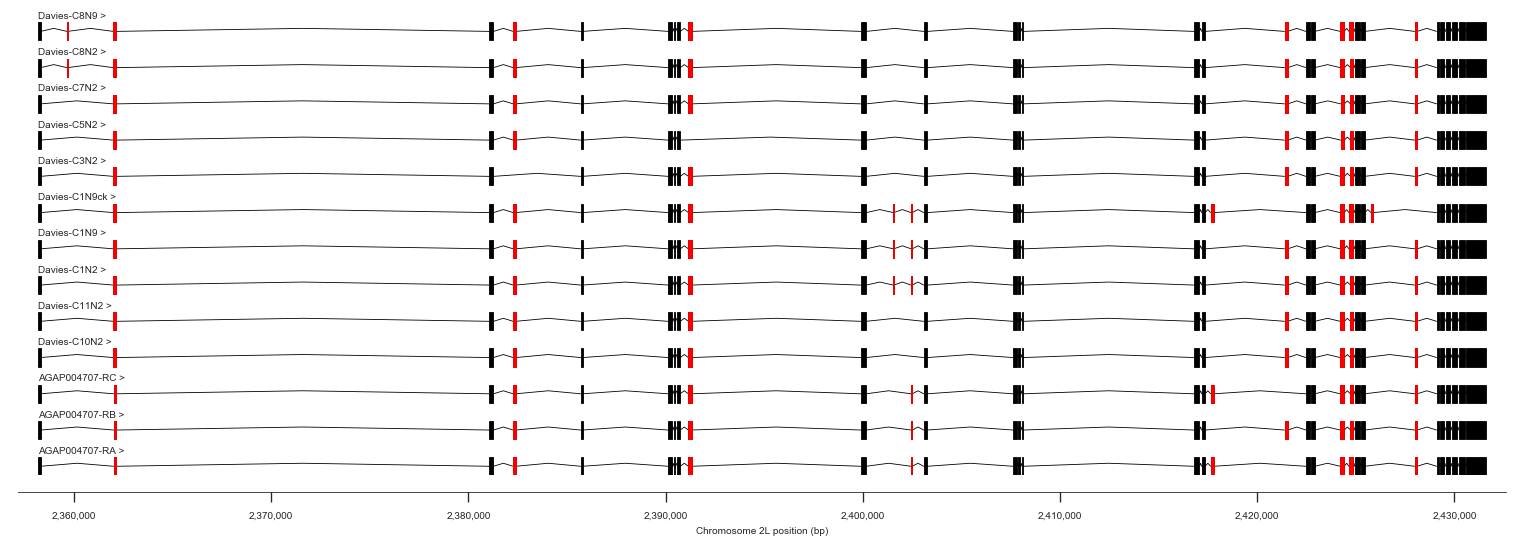

In [14]:
fig, ax = plt.subplots(figsize=(16, 5))
sns.despine(ax=ax, offset=10, left=True)
chrom, start, stop = region_vgsc
plot_transcripts(geneset_vgsc_combined, chrom, start-1000, stop+1000, highlight_exons=highlight_exons, ax=ax)

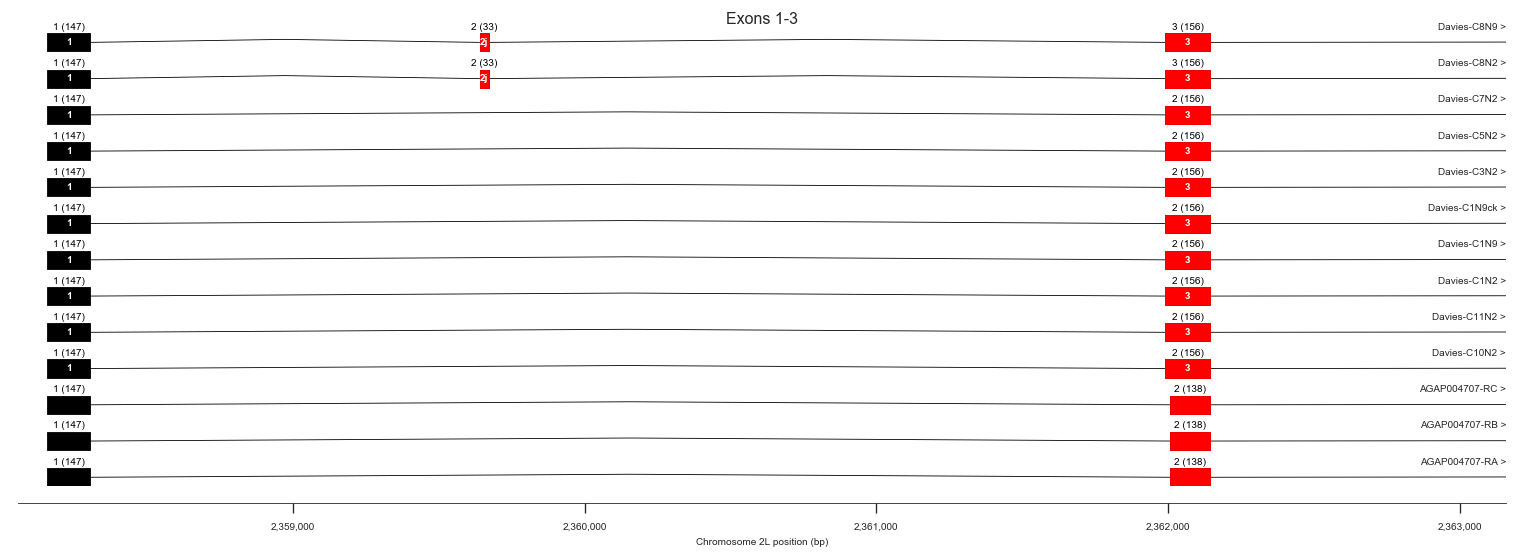

In [15]:
fig, ax = plt.subplots(figsize=(16, 5))
sns.despine(ax=ax, offset=10, left=True)
chrom, start, stop = region_vgsc
plot_transcripts(geneset_vgsc_combined, chrom, start-100, start+5000, ax=ax, 
                 label_transcripts='right', label_exons=True, label_exon_size=True, 
                 label_cdss='center', highlight_exons=highlight_exons)
ax.set_title('Exons 1-3', va='bottom');

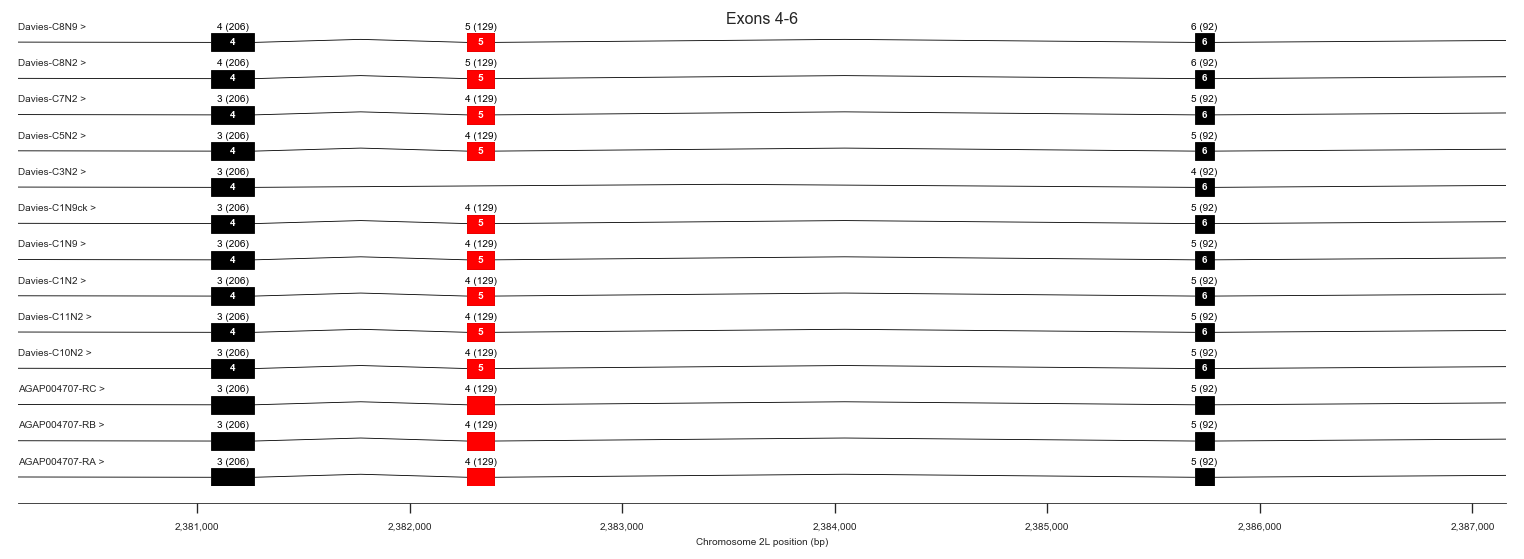

In [16]:
fig, ax = plt.subplots(figsize=(16, 5))
sns.despine(ax=ax, offset=10, left=True)
chrom, start, stop = region_vgsc
plot_transcripts(geneset_vgsc_combined, chrom, start+22000, start+29000, ax=ax, 
                 label_transcripts='left', label_exons=True, label_exon_size=True, 
                 label_cdss='center', highlight_exons=highlight_exons)
ax.set_title('Exons 4-6', va='bottom', loc='center');

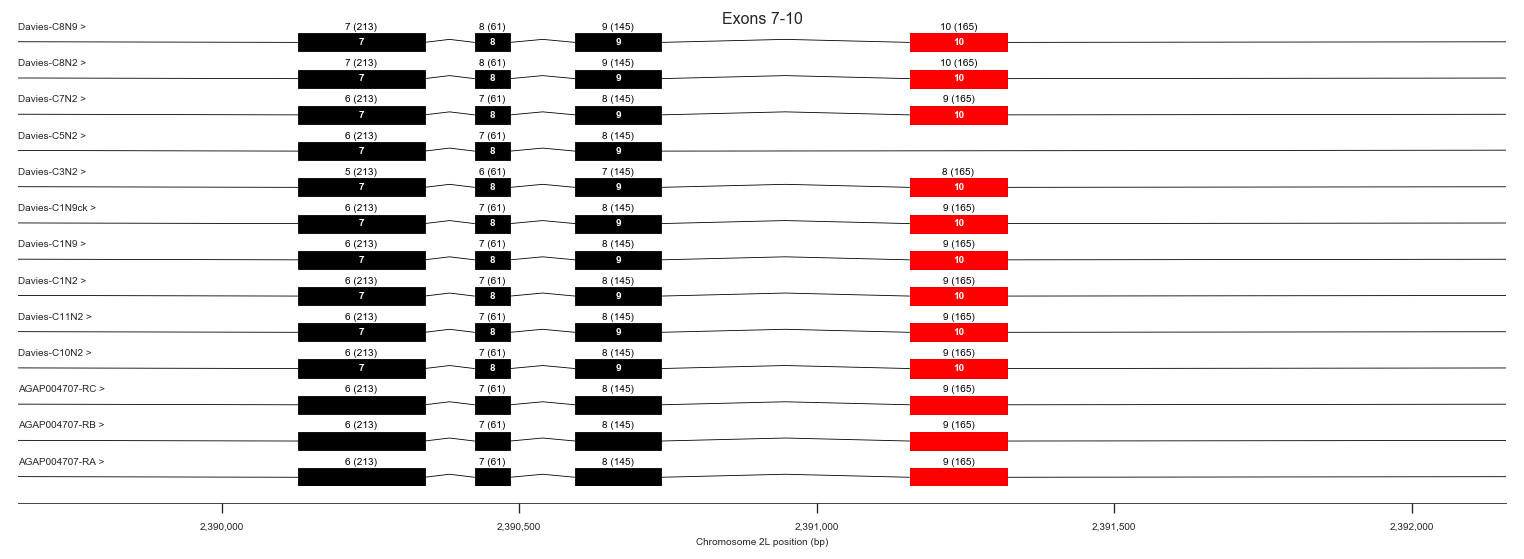

In [17]:
fig, ax = plt.subplots(figsize=(16, 5))
sns.despine(ax=ax, offset=10, left=True)
chrom, start, stop = region_vgsc
plot_transcripts(geneset_vgsc_combined, chrom, start+31500, start+34000, ax=ax, 
                 label_transcripts='left', label_exons=True, label_exon_size=True, 
                 label_cdss='center', highlight_exons=highlight_exons)
ax.set_title('Exons 7-10', va='bottom', loc='center');

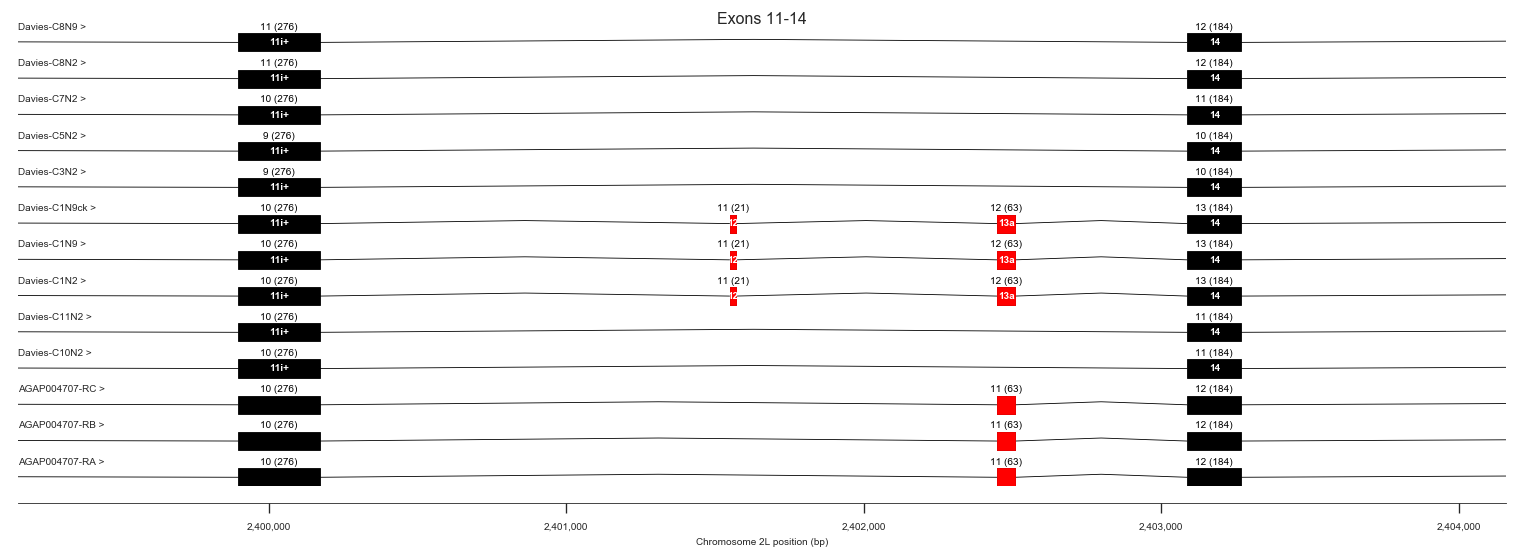

In [18]:
fig, ax = plt.subplots(figsize=(16, 5))
sns.despine(ax=ax, offset=10, left=True)
chrom, start, stop = region_vgsc
plot_transcripts(geneset_vgsc_combined, chrom, start+41000, start+46000, ax=ax, 
                 label_transcripts='left', label_exons=True, label_exon_size=True, 
                 label_cdss='center', highlight_exons=highlight_exons)
ax.set_title('Exons 11-14', va='bottom', loc='center');

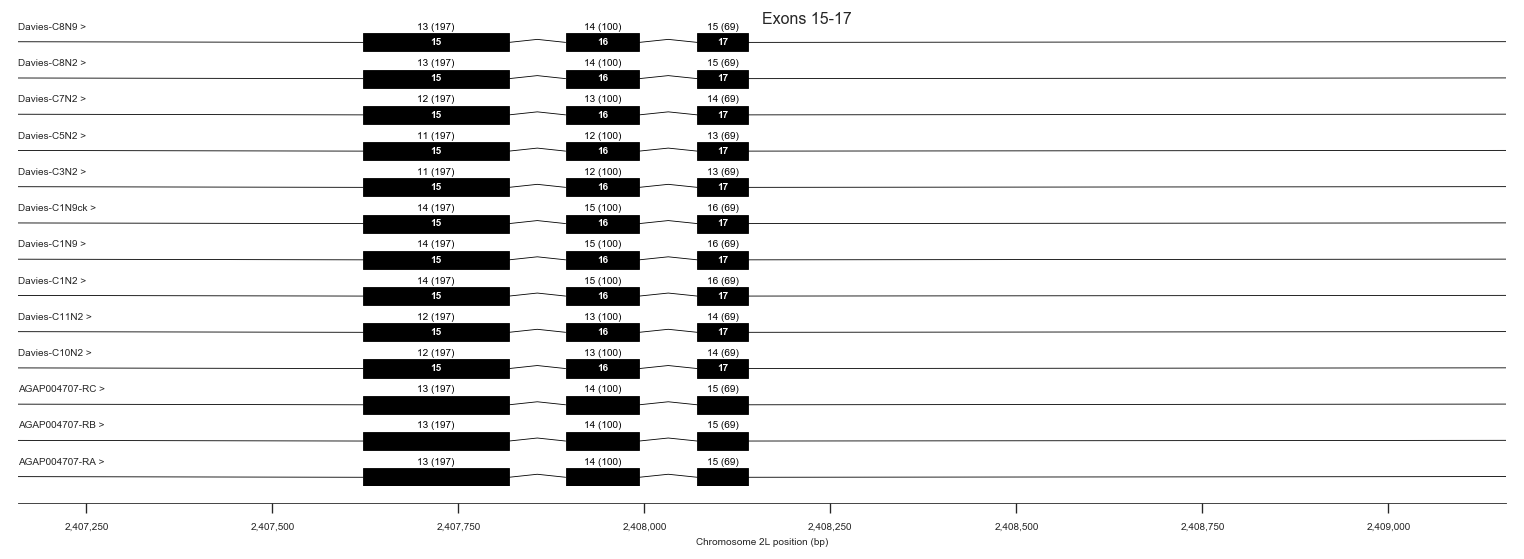

In [19]:
fig, ax = plt.subplots(figsize=(16, 5))
sns.despine(ax=ax, offset=10, left=True)
chrom, start, stop = region_vgsc
plot_transcripts(geneset_vgsc_combined, chrom, start+49000, start+51000, ax=ax, 
                 label_transcripts='left', label_exons=True, label_exon_size=True, 
                 label_cdss='center', highlight_exons=highlight_exons)
ax.set_title('Exons 15-17', va='bottom', loc='center', ha='left');

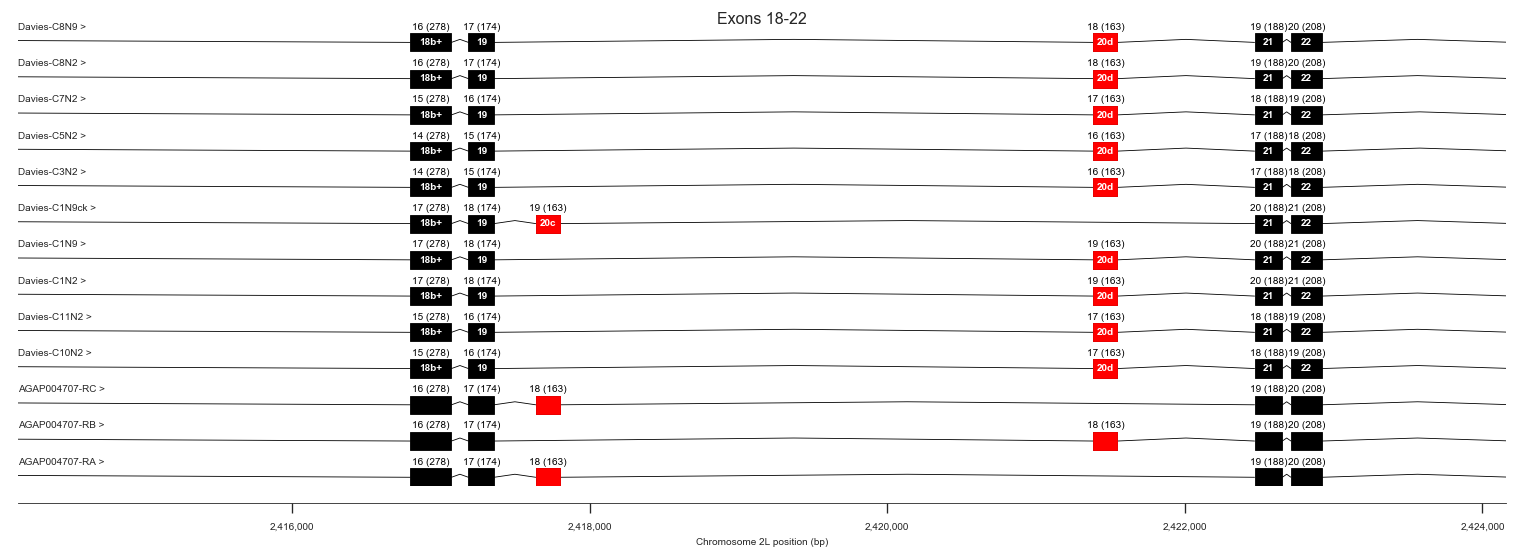

In [20]:
fig, ax = plt.subplots(figsize=(16, 5))
sns.despine(ax=ax, offset=10, left=True)
chrom, start, stop = region_vgsc
plot_transcripts(geneset_vgsc_combined, chrom, start+56000, start+66000, ax=ax, 
                 label_transcripts='left', label_exons=True, label_exon_size=True, 
                 label_cdss='center', highlight_exons=highlight_exons)
ax.set_title('Exons 18-22', va='bottom', loc='center');

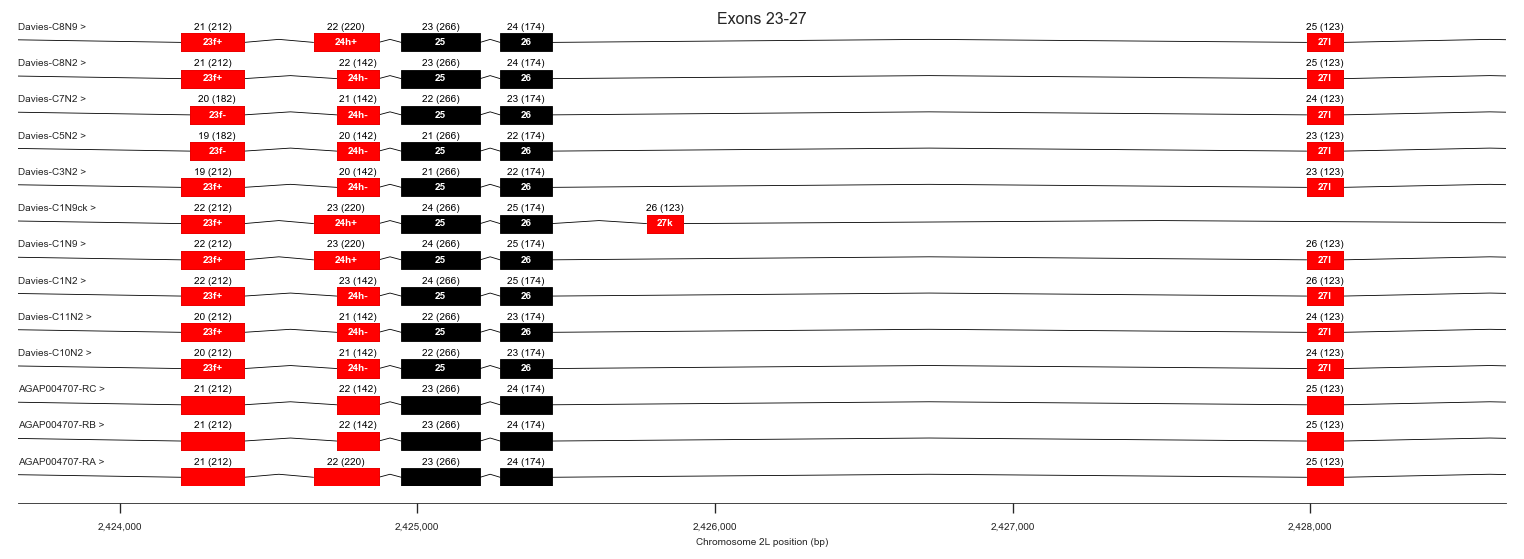

In [21]:
fig, ax = plt.subplots(figsize=(16, 5))
sns.despine(ax=ax, offset=10, left=True)
chrom, start, stop = region_vgsc
plot_transcripts(geneset_vgsc_combined, chrom, start+65500, start+70500, ax=ax, 
                 label_transcripts='left', label_exons=True, label_exon_size=True, 
                 label_cdss='center', highlight_exons=highlight_exons)
ax.set_title('Exons 23-27', va='bottom', loc='center');

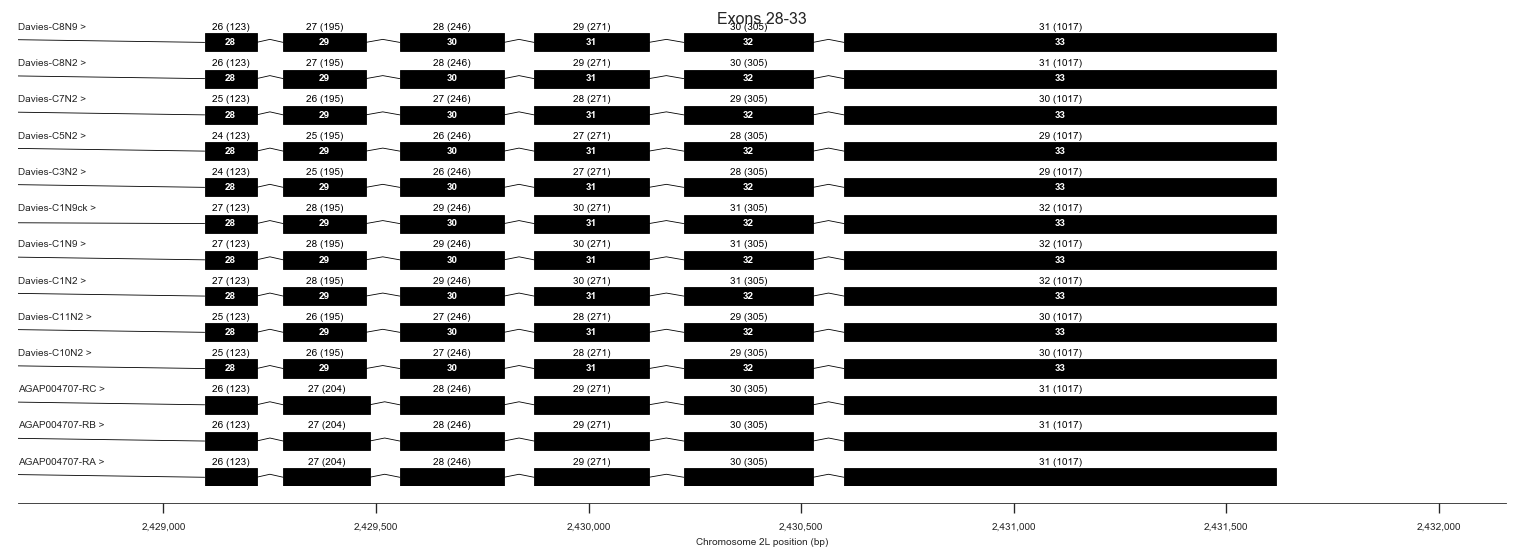

In [22]:
fig, ax = plt.subplots(figsize=(16, 5))
sns.despine(ax=ax, offset=10, left=True)
chrom, start, stop = region_vgsc
plot_transcripts(geneset_vgsc_combined, chrom, start+70500, start+74000, ax=ax, 
                 label_transcripts='left', label_exons=True, label_exon_size=True, 
                 label_cdss='center', highlight_exons=highlight_exons)
ax.set_title('Exons 28-33', va='bottom', loc='center');